In [ ]:
import vcf

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats
import sqlite3

In [3]:
# Set default plot stype for matplotlib
plt.style.use('ggplot')

# Set default figure size for matplotlib
plt.rcParams['figure.figsize'] = (16, 8)

In [4]:
# connect to untap database, found here: 
#https://workbench.su92l.arvadosapi.com/collections/22d61dd43786c65cd175b04ad6954af0+3119/html/index.html#

conn = sqlite3.connect('../example/untap.db')
c = conn.cursor()
c.execute('SELECT * FROM demographics')
rows = c.fetchall()
data = pd.DataFrame(rows,columns=zip(*c.description)[0])
conn.close()
data

,id,human_id,date_of_birth,gender,weight,height,blood_type,race
0,1,hu43860C,1954-08-28 (63 years old),Male,246lbs (112kg),6ft 5in (195cm),O+,White
1,2,huC30901,1962-05-23 (55 years old),Male,175lbs (79kg),6ft 2in (187cm),O-,White
2,3,hu9385BA,1955-07-05 (62 years old),Male,155lbs (70kg),,A+,
3,4,hu04FD18,1954-09-18 (63 years old),Male,,,O+,White
4,5,huAE6220,1949-04-24 (68 years old),Male,,,B+,White
5,6,hu604D39,1958-01-19 (60 years old),Male,245lbs (111kg),5ft 8in (172cm),AB+,Black or African American
6,7,hu6E4515,1921-07-09 (96 years old),Male,180lbs (82kg),6ft (182cm),O+,White
7,8,huA90CE6,1958-09-25 (59 years old),Male,,,,White
8,9,hu34D5B9,1973-01-20 (45 years old),,170lbs (77kg),5ft 11in (180cm),,
9,10,hu2FEC01,1985-10-06 (32 years old),,148lbs (67kg),5ft 9in (175cm),,


In [5]:
# Group data by blood type
bloodtype = data.groupby('blood_type')['human_id'].count()
bloodData = pd.DataFrame(columns=['PGP'])
bloodData.PGP = bloodtype[1:]

In [6]:
# Compare distribution of blood type in PGP with that of the general US population
## Note: Blood type distribution taken from American Red Cross website
## http://givebloodgivelife.org/education/bloodtypes.php

bTotal = bloodtype[1:].sum()
bloodData['USA'] = [0.34 ,.06, .03, 0.01, .09, .02, .38, .07];
bloodData['USA'] = bTotal*bloodData['USA']

In [7]:
bloodData2 = bloodData/bTotal
bloodData2

,PGP,USA
blood_type,,
A+,0.312849,0.34
A-,0.076816,0.06
AB+,0.037709,0.03
AB-,0.011173,0.01
B+,0.107542,0.09
B-,0.013966,0.02
O+,0.356145,0.38
O-,0.083799,0.07


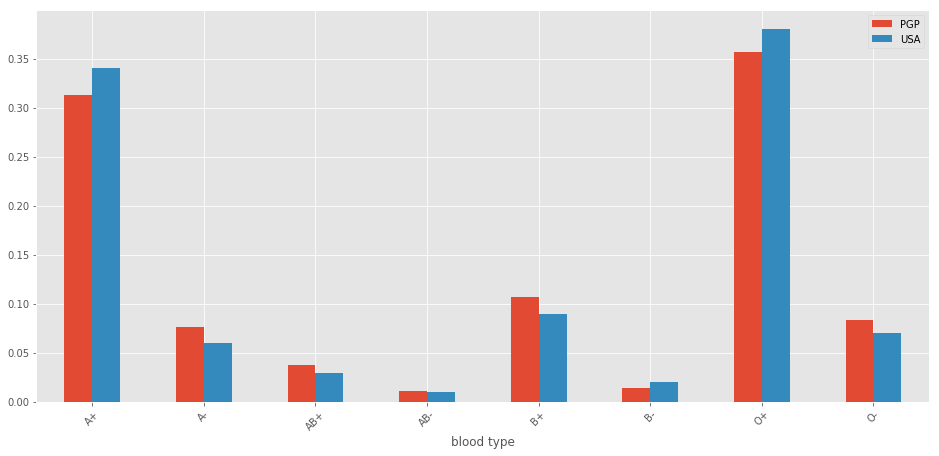

In [8]:
# Plot comparison as a bar plot

ax = bloodData2.plot(kind = 'bar')
labels = ax.get_xticklabels()
ax.set_xticklabels(bloodData.index,rotation=45);
ax.set_xlabel('blood type');
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig('bloodtypeAll.svg',format='svg')

In [9]:
# Calculate p-value
chi2, pvalue = stats.chisquare(bloodData['PGP'].values, f_exp= bloodData['USA'].values, axis=None)
pvalue

0.06704106720124471

In [10]:
# Now look at comparing results for just White participants
idx = data['race'].str.contains('White',na=False)
dataW = data[idx]

In [11]:
bloodtypeW = dataW.groupby('blood_type')['human_id'].count()
bloodDataW = pd.DataFrame(columns=['PGPWhite'])
bloodDataW.PGPWhite = bloodtypeW[1:]

In [12]:
# Compare distribution of blood type in PGP with that of the general US population
## Note: Blood type distribution taken from American Red Cross website
## http://www.redcrossblood.org/learn-about-blood/blood-types

bTotalW = bloodtypeW[1:].sum()
bloodDataW['White'] = [0.33 ,.07, .03, 0.01, .09, .02,.37, .08];
bloodDataW['White'] = bTotalW*bloodDataW['White']

In [13]:
bloodData2W = bloodDataW/bTotalW
bloodData2W['PGPAll']= bloodData2['PGP']

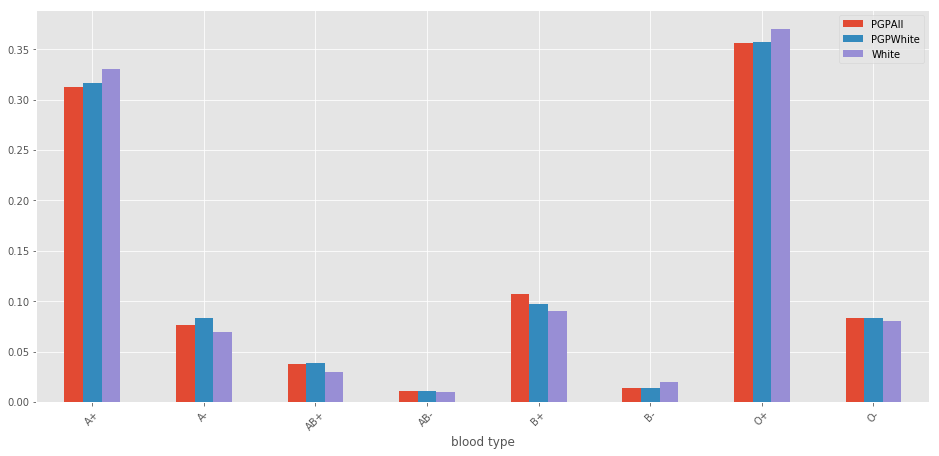

In [14]:
# Plot comparison as a bar plot
ax = bloodData2W[['PGPAll','PGPWhite','White']].plot(kind = 'bar')
labels = ax.get_xticklabels()
ax.set_xticklabels(bloodData.index,rotation=45);
ax.set_xlabel('blood type');
plt.gcf().subplots_adjust(bottom=0.2)

plt.savefig('bloodtypeWhite.svg',format='svg')

In [15]:
# Calculate p-value
chi2, pvalue = stats.chisquare(bloodDataW['PGPWhite'].values, f_exp= bloodDataW['White'].values, axis=None)
pvalue

0.5905536121319895